In [135]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
messages = pd.read_csv("C:\\Users\\EdwinVivekN\\AppData\\Local\\Programs\\Python\\Python37-32\\myscripts\\data\\smsspamcollection\\SMSSpamCollection",
                      sep='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
message = [x.strip() for x in messages['message']]
message[0:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [54]:
le = LabelEncoder()
label = le.fit_transform(messages['label'])
pd.crosstab(len(label), label)
#label = pd.get_dummies(messages['label'], drop_first=True)

col_0,0,1
row_0,,
5572,4825,747


In [67]:
#remove stopwords 
#stemming
#convert to-lower
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ',message[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

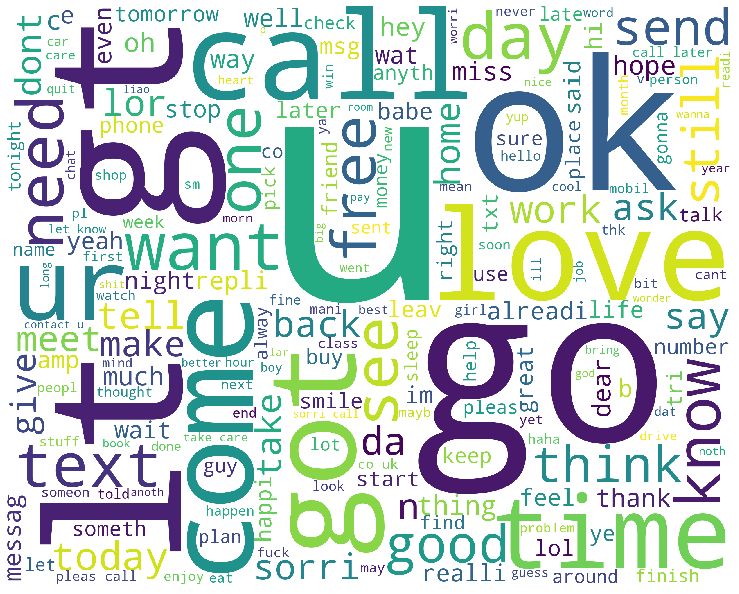

In [138]:
#word cloud
cleaned_word = " ".join([word for word in corpus])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
#not used 
vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 6000, ngram_range=(1,5))
data_features = vectorizer.fit_transform(corpus)
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)
data_mat = data_features_tfidf.toarray()
data_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
x_train, x_test, y_train, y_test = train_test_split(corpus, messages['label'], test_size=0.2, random_state=333)

In [409]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
tfidf = TfidfVectorizer()
lreg = LogisticRegression(solver='lbfgs')
model = Pipeline([('vectorizer', tfidf), ('classifier', lreg)])
model.fit(x_train, y_train)
predictions = model.predict(x_test)
pred_prob = model.predict_proba(x_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[950   3]
 [ 47 115]]
0.9551569506726457


In [143]:
ex = ['hi please respond to my mail urgent']
ex2 = ['urgent mobil number award prize guarante call land line claim valid hr']
result = model.predict(ex2)
print(result)

['spam']


In [207]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y_test, predictions, average='weighted'))
print('Recall:' , recall_score(y_test, predictions, average='macro'))
print('F1 score:' , f1_score(y_test, predictions, average=None))

Precision: 0.956013971838751
Recall: 0.853364294689933
F1 score: [0.97435897 0.82142857]


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       953
        spam       0.97      0.71      0.82       162

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



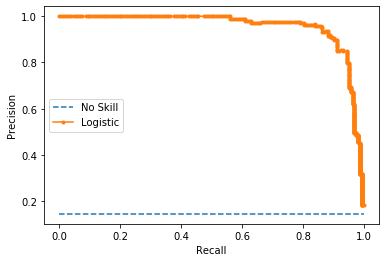

In [264]:
from sklearn.metrics import precision_recall_curve
lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
testy = pd.get_dummies(y_test)
testy = testy.loc[:, 'spam']
pr, re, _ = precision_recall_curve(testy, lr_probs)
no_skill = len(y_test[y_test=='spam']) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(re, pr, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [355]:
from sklearn.metrics import auc, f1_score
lr_pred = pd.get_dummies(predictions)
lr_pred = lr_pred.loc[:, 'spam']
lr_auc = auc(re, pr)
lr_auc
f1 = f1_score(testy, lr_pred, average='macro')
print(f1)

0.8978937728937728


In [354]:
fscore = (2 * pr * re) / (pr + re)
ix_f = np.argmax(fscore)
print('Best Threshold= %f, F-Score =%.3f' % (_[ix_f], fscore[ix_f]))

Best Threshold= 0.238556, F-Score =0.908


AUC : 0.8571428571428571


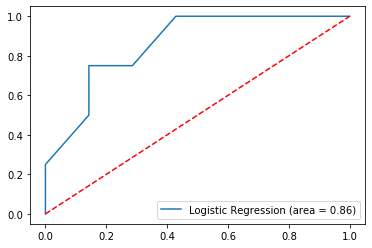

In [334]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

estimate = np.array([-3, -2.5, -1, -1, -0.5, -0.5, 0.5, 1, 2, 2, 3.5 ])
Class = np.array([-1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1])
m = LogisticRegression(solver='lbfgs')
m.fit(estimate.reshape(-1,1), Class)
pred = m.predict(estimate.reshape(-1,1))
pred_proba = m.predict_proba(estimate.reshape(-1,1))

logit_roc_auc = roc_auc_score(Class,  pred_proba[:,1])
print("AUC :", logit_roc_auc)
fpr, tpr, thresholds = roc_curve(Class, pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower right")

In [341]:
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold= %f, G-Mean= %.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold= 0.480526, G-Mean= 0.802


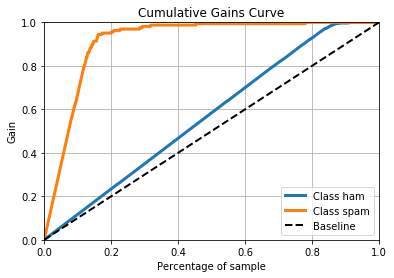

In [413]:
#gain and lift charts
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, pred_prob)

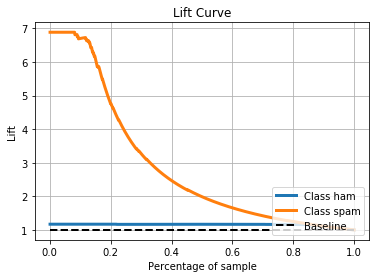

In [416]:
skplt.metrics.plot_lift_curve(y_test, pred_prob)

In [144]:
#punctuation list to remove
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [73]:
#Stemming comparison
def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words
    
def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words    
## Demonstrate ##    
str = "Please don't unbuckle your seat-belt while I am driving, he said"
print("porter:", stem_with_porter(str.split()))

print("lancaster:", stem_with_lancaster(str.split()))

porter: ['pleas', "don't", 'unbuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving,', 'he', 'said']
lancaster: ['pleas', "don't", 'unbuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving,', 'he', 'said']
